In [1]:
import numpy as np
from numpy.fft import fft, ifft, fft2, ifft2
import matplotlib.pyplot as plt
%matplotlib inline

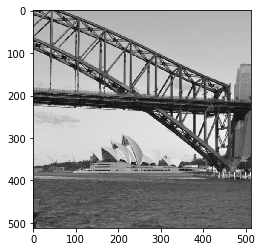

In [2]:
f = np.array(plt.imread('operahall.png'), dtype=float)
plt.imshow(f, cmap='gray')

In [3]:
#part a: isolating 32x32 block
topLeft32 = f[0:32, 0:32]

In [4]:
#finding fast fourier 2D Transform
F = fft2(topLeft32)
print(F)

[[519.23530821 +0.j          24.53830646 -0.78382008j
   -8.81242334-11.1406694j  ...   2.40976466 +8.29940619j
   -8.81242334+11.1406694j   24.53830646 +0.78382008j]
 [ 15.27281392+57.54631653j  18.64878857+35.39252172j
   13.35550003 +3.55072955j ... -11.61699604 -8.26053223j
   -7.91815643 -7.83446377j   2.78189334-21.62189728j]
 [-27.6133949  -0.51326527j -12.75085856-11.58109798j
   18.00961995 -4.16579869j ...   0.71817603 +4.66049038j
   -2.68145114+21.67754778j  31.47066557 +1.82765252j]
 ...
 [-21.2958431 -23.15874894j -24.1609424 +36.47167444j
    6.89784291 -6.58442709j ...  -1.11415152+14.52763127j
    1.44907062-15.48646385j   4.80045857+14.60262886j]
 [-27.6133949  +0.51326527j  31.47066557 -1.82765252j
   -2.68145114-21.67754778j ...  -1.35796285+13.59126112j
   18.00961995 +4.16579869j -12.75085856+11.58109798j]
 [ 15.27281392-57.54631653j   2.78189334+21.62189728j
   -7.91815643 +7.83446377j ...  -1.00414413 -9.53412552j
   13.35550003 -3.55072955j  18.64878857-35.3925

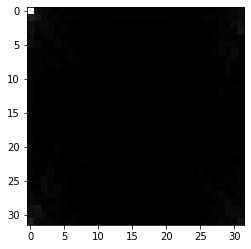

In [5]:
plt.imshow(abs(F), cmap='gray')
#pixel at F[0][0] is the whitest, it is the average, when the DC is set, the details within 
#the other pixels seem to get lost, but when it 
#is removed, we are able to see more clearly the 32x32 image details.

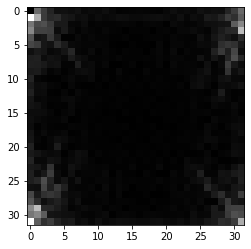

In [6]:
#removing F[0][0]
F[0][0] = 0
plt.imshow(abs(F), cmap='gray')

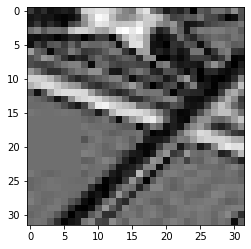

In [8]:
F = ifft2(F)
plt.imshow(abs(F), cmap='gray')

In [12]:
#part b Compress(x, tol)
def Compress(X, tol):
    
    subBlocksIFFT = []
    rows = int(len(X)/32)
    cols = int(len(X[0])/32)

    #spliting image into 32x32 blocks
    for i in range(rows):
        subBlocksIFFT.append([])
        for j in range(cols):
            subBlocksIFFT[i].append(fft2(X[32*i:32*i+32, 32*j:32*j+32]))

    dropped = 0
    nonzero = 0

    
    X1 = np.zeros(shape=(len(X), len(X[0])))

    #dropping pixels that are below threshold
    for i in range(len(subBlocksIFFT)):
        for l in range(len(subBlocksIFFT[i])):

            absIFFT = abs(subBlocksIFFT[i][l])
            Fmax = np.amax(absIFFT)

            for j in range(len(subBlocksIFFT[i][l])):
                for k in range(len(subBlocksIFFT[i][l][j])):
                    if subBlocksIFFT[i][l][j][k] != 0:
                        nonzero = nonzero + 1

                    if abs(subBlocksIFFT[i][l][j][k]) <= Fmax*(tol):
                        subBlocksIFFT[i][l][j][k] = 0
                        dropped = dropped + 1

            subBlocksIFFT[i][l] = ifft2(subBlocksIFFT[i][l])

    #combining 32x32 blocks back
    for i in range(len(subBlocksIFFT)):
        for l in range(len(subBlocksIFFT[i])):
            for j in range(len(subBlocksIFFT[i][l])):
                for k in range(len(subBlocksIFFT[i][l][j])):
                    X1[i*32+j][l*32+k] = subBlocksIFFT[i][l][j][k]
                    
    #calculating drop
    drop = dropped/nonzero
                    
    return [X1,drop]

C:\Users\graciex\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: ComplexWarning: Casting complex values to real discards the imaginary part


tol: 0.00098 drop: 0.5


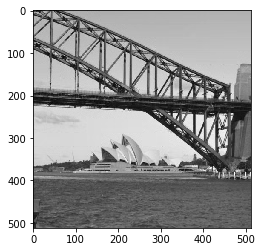

In [13]:
#part c: Estimating drop sizes with various images
test = Compress(f,0.00098)
plt.imshow(abs(test[0]), cmap='gray')
print("tol: " + str(0.00098) + " drop: " + str(round(test[1],2)))

C:\Users\graciex\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: ComplexWarning: Casting complex values to real discards the imaginary part


tol: 0.0038 drop: 0.82


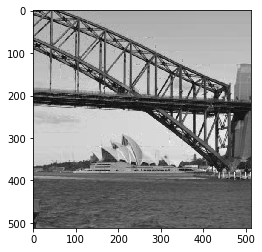

In [14]:
#part c: Estimating drop sizes with various images
test1 = Compress(f,0.0042)
plt.imshow(abs(test1[0]), cmap='gray')
print("tol: " + str(0.0038) + " drop: " + str(round(test1[1], 2)))

C:\Users\graciex\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: ComplexWarning: Casting complex values to real discards the imaginary part


tol: 0.0085 drop: 0.92


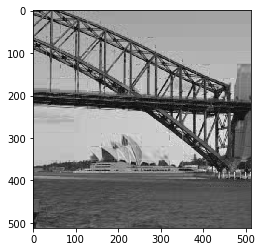

In [15]:
#part c: Estimating drop sizes with various images
test2 = Compress(f,0.0085)
plt.imshow(abs(test2[0]), cmap='gray')
print("tol: " + str(0.0085) + " drop: " + str(round(test2[1], 2)))

C:\Users\graciex\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: ComplexWarning: Casting complex values to real discards the imaginary part


tol: 0.0154 drop: 0.97


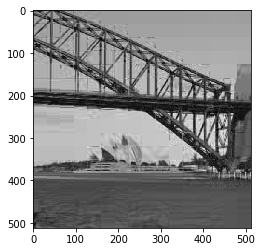

In [16]:
#part c: Estimating drop sizes with various images
test3 = Compress(f,0.0154)
plt.imshow(abs(test3[0]), cmap='gray')
print("tol: " + str(0.0154) + " drop: " + str(round(test3[1],2)))

[[-2.65206203e-03  2.13861206e-03 -8.61080904e-03 ... -2.71217863e-03
   1.20938976e-03  1.20938976e-03]
 [ 8.27280645e-03 -1.88908273e-03  1.72635056e-04 ...  2.30552546e-03
   6.22709385e-03  6.22709385e-03]
 [-1.01827257e-02  3.46604676e-03 -5.50905119e-04 ...  1.87001580e-03
   5.79158419e-03  5.79158419e-03]
 ...
 [-5.36198147e-04  3.09433526e-03  2.59203574e-03 ... -6.91678164e-03
  -3.97097703e-03  1.78945615e-02]
 [ 5.69996473e-03  6.40821818e-04 -1.52578305e-03 ... -2.92283451e-04
   1.88876737e-04  7.07826742e-03]
 [-8.01757202e-03 -2.33934449e-04  6.87452687e-05 ...  3.26440655e-03
  -5.14959897e-03 -2.28737118e-02]]


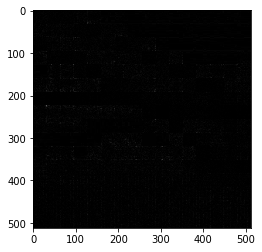

In [20]:
#part c: absolute difference with tol: 0.00098 drop: 0.5 
reduced = np.zeros(shape=(len(f),len(f[0])))
for i in range(len(f)):
    for j in range(len(f[0])):
        reduced[i][j] = f[i][j]-test[0][i][j]
        
print(reduced)
reduced[0][0] = 0
        
plt.imshow(abs(reduced), cmap='gray')